In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv('df_train.csv')
data.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-05-15,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2014-11-14,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2014-12-24,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2015-02-22,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,2015-01-06,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4


In [64]:
data.drop(columns='date', inplace=True)
data.head()


,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4


In [65]:
data.isna().sum()

price                0
bedrooms             0
grade                0
has_basement         0
living_in_m2         0
renovated            0
nice_view            0
perfect_condition    0
real_bathrooms       0
has_lavatory         0
single_floor         0
month                0
quartile_zone        0
dtype: int64

In [66]:
Y = data['price']
Y

0        312000.0
1        310000.0
2        320000.0
3        264500.0
4        700000.0
           ...   
13598    353950.0
13599    289950.0
13600    625504.0
13601    730000.0
13602    383000.0
Name: price, Length: 13603, dtype: float64

In [67]:
X = data.drop(columns='price').copy()
X

,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,3,2,True,341.88304,False,False,False,3,False,False,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
13598,3,3,False,302.86378,False,False,False,2,True,False,10,1
13599,2,2,False,155.14801,False,False,False,2,True,False,8,2
13600,2,3,True,117.98681,False,False,False,2,True,False,7,4
13601,3,5,False,340.02498,False,False,False,2,True,False,11,4


*Finding Mean of each class*

\[\text{Mean}(X) = \frac{1}{n} \sum_{i=1}^{n} X_i\]

Where:
- \( X_i \) is the value of the feature for observation \( i \),
- \( n \) is the total number of observations (rows).

In [68]:
u = X.mean()
u

bedrooms               2.238624
grade                  2.530177
has_basement           0.376682
living_in_m2         181.746181
renovated              0.038888
nice_view              0.076674
perfect_condition      0.074395
real_bathrooms         1.678968
has_lavatory           0.680879
single_floor           0.512093
month                  6.579872
quartile_zone          2.425568
dtype: float64

*Centerailzed Matrix*

In [69]:
D_Centralized = X - u
D_Centralized

,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,-0.238624,-0.530177,0.623318,-43.320711,-0.038888,-0.076674,-0.074395,0.321032,0.319121,-0.512093,-1.579872,-1.425568
1,-0.238624,-0.530177,-0.376682,-75.836761,-0.038888,-0.076674,-0.074395,-0.678968,0.319121,-0.512093,4.420128,0.574432
2,-0.238624,-0.530177,-0.376682,-63.759371,-0.038888,0.923326,-0.074395,-0.678968,-0.680879,0.487907,5.420128,-0.425568
3,-0.238624,0.469823,-0.376682,-30.314291,-0.038888,-0.076674,-0.074395,0.321032,0.319121,0.487907,-4.579872,-1.425568
4,0.761376,-0.530177,0.623318,160.136859,-0.038888,-0.076674,-0.074395,1.321032,-0.680879,-0.512093,-5.579872,1.574432
...,...,...,...,...,...,...,...,...,...,...,...,...
13598,0.761376,0.469823,-0.376682,121.117599,-0.038888,-0.076674,-0.074395,0.321032,0.319121,-0.512093,3.420128,-1.425568
13599,-0.238624,-0.530177,-0.376682,-26.598171,-0.038888,-0.076674,-0.074395,0.321032,0.319121,-0.512093,1.420128,-0.425568
13600,-0.238624,0.469823,0.623318,-63.759371,-0.038888,-0.076674,-0.074395,0.321032,0.319121,-0.512093,0.420128,1.574432
13601,0.761376,2.469823,-0.376682,158.278799,-0.038888,-0.076674,-0.074395,0.321032,0.319121,-0.512093,4.420128,1.574432


In [70]:
D_T = D_Centralized.T
D_T

,0,1,2,3,4,5,6,7,8,9,...,13593,13594,13595,13596,13597,13598,13599,13600,13601,13602
bedrooms,-0.238624,-0.238624,-0.238624,-0.238624,0.761376,-1.238624,-0.238624,-1.238624,-0.238624,-0.238624,...,-1.238624,-0.238624,0.761376,0.761376,-1.238624,0.761376,-0.238624,-0.238624,0.761376,0.761376
grade,-0.530177,-0.530177,-0.530177,0.469823,-0.530177,-0.530177,-0.530177,-1.530177,-0.530177,0.469823,...,0.469823,0.469823,0.469823,-0.530177,-0.530177,0.469823,-0.530177,0.469823,2.469823,0.469823
has_basement,0.623318,-0.376682,-0.376682,-0.376682,0.623318,0.623318,0.623318,-0.376682,-0.376682,-0.376682,...,-0.376682,-0.376682,-0.376682,-0.376682,0.623318,-0.376682,-0.376682,0.623318,-0.376682,-0.376682
living_in_m2,-43.320711,-75.836761,-63.759371,-30.314291,160.136859,-97.204451,-46.107801,-42.391681,-75.836761,-62.830341,...,-52.611011,-9.875631,44.008109,-36.817501,-90.701241,121.117599,-26.598171,-63.759371,158.278799,38.433929
renovated,-0.038888,-0.038888,-0.038888,-0.038888,-0.038888,-0.038888,-0.038888,-0.038888,-0.038888,-0.038888,...,-0.038888,-0.038888,-0.038888,-0.038888,-0.038888,-0.038888,-0.038888,-0.038888,-0.038888,-0.038888
nice_view,-0.076674,-0.076674,0.923326,-0.076674,-0.076674,0.923326,-0.076674,-0.076674,-0.076674,-0.076674,...,-0.076674,-0.076674,-0.076674,-0.076674,-0.076674,-0.076674,-0.076674,-0.076674,-0.076674,-0.076674
perfect_condition,-0.074395,-0.074395,-0.074395,-0.074395,-0.074395,-0.074395,-0.074395,-0.074395,-0.074395,-0.074395,...,-0.074395,-0.074395,-0.074395,-0.074395,-0.074395,-0.074395,-0.074395,-0.074395,-0.074395,-0.074395
real_bathrooms,0.321032,-0.678968,-0.678968,0.321032,1.321032,-0.678968,-0.678968,-0.678968,-0.678968,0.321032,...,-0.678968,-0.678968,0.321032,-0.678968,-0.678968,0.321032,0.321032,0.321032,0.321032,0.321032
has_lavatory,0.319121,0.319121,-0.680879,0.319121,-0.680879,-0.680879,0.319121,-0.680879,0.319121,0.319121,...,0.319121,0.319121,0.319121,0.319121,0.319121,0.319121,0.319121,0.319121,0.319121,0.319121
single_floor,-0.512093,-0.512093,0.487907,0.487907,-0.512093,0.487907,0.487907,0.487907,0.487907,-0.512093,...,-0.512093,0.487907,-0.512093,0.487907,-0.512093,-0.512093,-0.512093,-0.512093,-0.512093,-0.512093


In [71]:
D_F = D_T.dot(D_Centralized)

In [72]:
D_F

,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
bedrooms,6329.427038,3139.044917,547.291480,3.769156e+05,-16.232008,85.115342,8.512681,2367.070279,1278.866059,-1020.253621,137.735205,333.606631
grade,3139.044917,12792.362273,-78.627803,6.208478e+05,-68.463721,471.025215,-369.539293,4335.283687,2456.499081,-2755.214144,487.962508,4427.804381
has_basement,547.291480,-78.627803,3193.883408,7.691909e+04,39.735426,274.121076,143.798206,381.968610,303.174888,936.035874,249.735426,570.390135
living_in_m2,376915.622717,620847.817373,76919.085510,6.274260e+07,1834.096858,41212.108250,-9745.529699,353046.269896,172765.786221,-168487.573076,43889.984316,193661.199863
renovated,-16.232008,-68.463721,39.735426,1.834097e+03,508.427994,37.439315,-21.355142,42.825994,-60.185106,-9.897155,69.247666,102.874586
nice_view,85.115342,471.025215,274.121076,4.121211e+04,37.439315,963.028744,21.405646,171.836507,80.842976,41.887084,57.193413,78.132691
perfect_condition,8.512681,-369.539293,143.798206,-9.745530e+03,-21.355142,21.405646,936.711902,-78.115489,-107.049768,162.761964,294.169448,60.325296
real_bathrooms,2367.070279,4335.283687,381.968610,3.530463e+05,42.825994,171.836507,-78.115489,5351.052709,683.399544,-1867.690215,300.301404,1220.454973
has_lavatory,1278.866059,2456.499081,303.174888,1.727658e+05,-60.185106,80.842976,-107.049768,683.399544,2955.696685,-854.004631,208.224730,596.390208
single_floor,-1020.253621,-2755.214144,936.035874,-1.684876e+05,-9.897155,41.887084,162.761964,-1867.690215,-854.004631,3398.760715,-344.388958,-1047.505918


In [73]:
C_Matrix = 1/13603 * (D_F)

In [74]:
C_Matrix

,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
bedrooms,0.465296,0.230761,0.040233,27.708272,-0.001193,0.006257,0.000626,0.174011,0.094014,-0.075002,0.010125,0.024524
grade,0.230761,0.940407,-0.005780,45.640507,-0.005033,0.034627,-0.027166,0.318701,0.180585,-0.202545,0.035872,0.325502
has_basement,0.040233,-0.005780,0.234793,5.654568,0.002921,0.020152,0.010571,0.028080,0.022287,0.068811,0.018359,0.041931
living_in_m2,27.708272,45.640507,5.654568,4612.408879,0.134830,3.029634,-0.716425,25.953560,12.700565,-12.386060,3.226493,14.236654
renovated,-0.001193,-0.005033,0.002921,0.134830,0.037376,0.002752,-0.001570,0.003148,-0.004424,-0.000728,0.005091,0.007563
nice_view,0.006257,0.034627,0.020152,3.029634,0.002752,0.070795,0.001574,0.012632,0.005943,0.003079,0.004204,0.005744
perfect_condition,0.000626,-0.027166,0.010571,-0.716425,-0.001570,0.001574,0.068861,-0.005743,-0.007870,0.011965,0.021625,0.004435
real_bathrooms,0.174011,0.318701,0.028080,25.953560,0.003148,0.012632,-0.005743,0.393373,0.050239,-0.137300,0.022076,0.089720
has_lavatory,0.094014,0.180585,0.022287,12.700565,-0.004424,0.005943,-0.007870,0.050239,0.217283,-0.062781,0.015307,0.043843
single_floor,-0.075002,-0.202545,0.068811,-12.386060,-0.000728,0.003079,0.011965,-0.137300,-0.062781,0.249854,-0.025317,-0.077006


In [75]:
eigenValues, eigenVectors = np.linalg.eig(C_Matrix)

In [76]:
eigenValues

array([4.61329657e+03, 9.77282323e+00, 1.16467873e+00, 5.15474161e-01,
       3.10255709e-01, 2.65090800e-01, 2.37173650e-01, 1.75988584e-01,
       1.00994209e-01, 3.65967521e-02, 6.50860878e-02, 6.78498218e-02])

In [77]:
eigenVectors

array([[-6.00704059e-03,  1.02158867e-03,  8.00191227e-02,
         6.05832426e-02, -8.63253518e-01,  4.02259871e-01,
        -1.52703006e-01,  2.28234492e-01, -7.17465429e-02,
         2.53654502e-03,  4.72826949e-02,  8.42596565e-03],
       [-9.89545997e-03, -5.56742095e-04, -2.77826230e-01,
        -7.99899564e-01,  1.64142252e-01,  4.24120026e-01,
         1.00716639e-01,  2.30447022e-01, -9.67277040e-02,
         2.20373155e-02, -5.39421678e-02,  7.29706865e-03],
       [-1.22573618e-03, -1.50833307e-03, -1.31073116e-04,
         2.96700739e-01,  7.52410581e-02,  4.57756892e-01,
         5.87269217e-01, -3.35288130e-01, -4.70914579e-01,
        -1.11078515e-02, -8.09408192e-02, -1.04993726e-01],
       [-9.99903774e-01,  7.30906919e-04,  5.61625917e-03,
         9.01402116e-03,  6.61785187e-03, -4.75423636e-03,
        -3.41981409e-03,  6.38528524e-04,  2.03852768e-04,
        -1.18626194e-04, -5.54453078e-04, -4.98583515e-04],
       [-2.92202118e-05, -5.17697855e-04, -4.5939847

In [78]:
biggestIndexes = np.argsort(eigenValues)[::-1]

In [79]:
sortedVectors = eigenVectors[:, biggestIndexes]

In [80]:
k = 2

In [81]:
topEigenVectors = sortedVectors[:,:k]
topEigenVectors

array([[-6.00704059e-03,  1.02158867e-03],
       [-9.89545997e-03, -5.56742095e-04],
       [-1.22573618e-03, -1.50833307e-03],
       [-9.99903774e-01,  7.30906919e-04],
       [-2.92202118e-05, -5.17697855e-04],
       [-6.56774028e-04, -2.14303435e-04],
       [ 1.55349902e-04, -2.28234402e-03],
       [-5.62684783e-03, -4.25579048e-04],
       [-2.75354563e-03, -6.75719979e-04],
       [ 2.68552219e-03,  1.76039276e-03],
       [-7.00997364e-04, -9.99972614e-01],
       [-3.08740750e-03, -6.43028970e-03]])

In [82]:
variance = eigenValues/np.sum(eigenValues)
variance

array([9.97252056e-01, 2.11258217e-03, 2.51767525e-04, 1.11429573e-04,
       6.70676900e-05, 5.73044333e-05, 5.12696089e-05, 3.80432895e-05,
       2.18318247e-05, 7.91108608e-06, 1.40695995e-05, 1.46670333e-05])

In [83]:
comulativeVariance = np.cumsum(variance)
comulativeVariance

array([0.99725206, 0.99936464, 0.99961641, 0.99972784, 0.9997949 ,
       0.99985221, 0.99990348, 0.99994152, 0.99996335, 0.99997126,
       0.99998533, 1.        ])

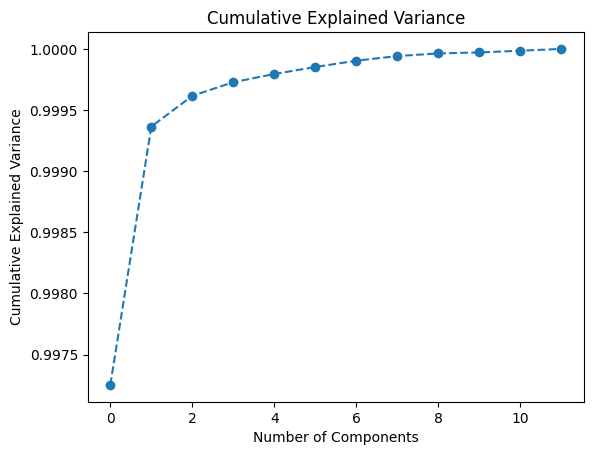

In [84]:
plt.plot(comulativeVariance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [85]:
projectedData = X.dot(topEigenVectors)

In [86]:
X.columns

Index(['bedrooms', 'grade', 'has_basement', 'living_in_m2', 'renovated',
       'nice_view', 'perfect_condition', 'real_bathrooms', 'has_lavatory',
       'single_floor', 'month', 'quartile_zone'],
      dtype='object')

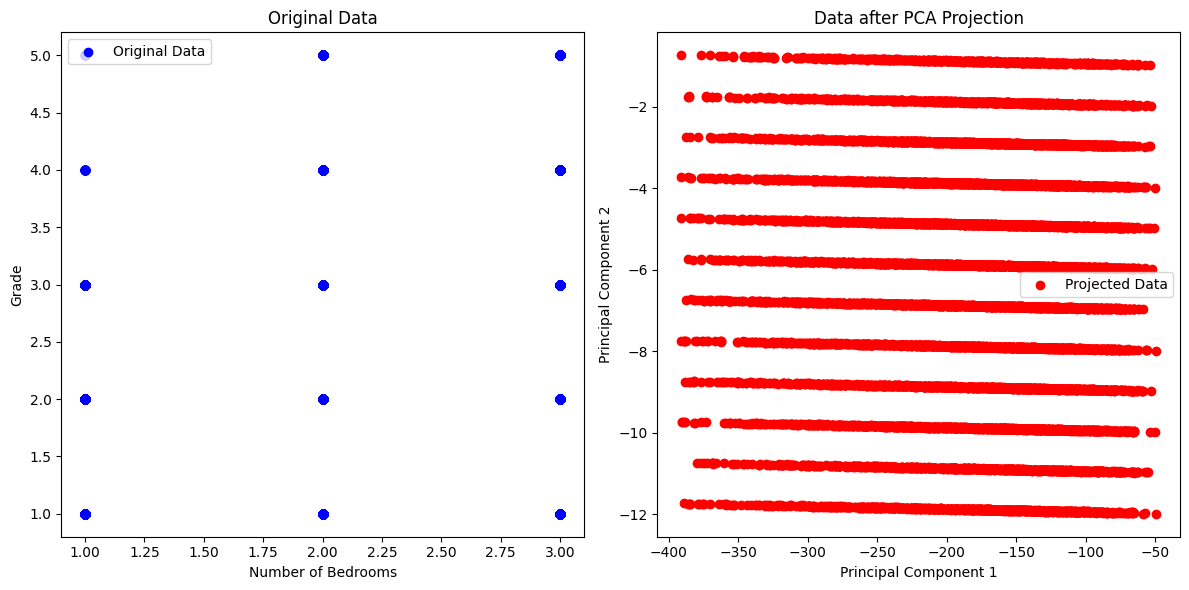

In [88]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X['bedrooms'], X['grade'], color='blue', label='Original Data')
plt.title('Original Data')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Grade')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(projectedData[0], projectedData[1], color='red', label='Projected Data')
plt.title('Data after PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()